In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
import pylab as pl
import seaborn as sns

from MiscFuncs import df_stats
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [872]:
path_x = r'/Users/Adamin/Documents/Alpha/notebooks'
path = r'/vol/sci/astro/bigdata/tussbaum/halofinder/catalog/'
path_1 = r'/vol/sci/astro/home/adambeilialpha/'
sgal_qlabel_0 = pd.read_pickle(path_1 + r'/sgal_qlabel_0.pkl')
sgal_qlabel_1 = pd.read_pickle(path_1 + r'/sgal_qlabel_1.pkl')
sgal_qlabel_2 = pd.read_pickle(path_1 + r'/sgal_qlabel_2.pkl')
sgal_qlabel_3 = pd.read_pickle(path_1 + r'/sgal_qlabel_3.pkl')
sgal_qlabel_4 = pd.read_pickle(path_1 + r'/sgal_qlabel_4.pkl')
sgal_qlabel_118_596 = pd.read_pickle(path_1 + r'/sgal_qlabel.pkl')

sgal_qlabel_all = pd.concat([sgal_qlabel_0, sgal_qlabel_1,sgal_qlabel_2, sgal_qlabel_3,sgal_qlabel_4], axis=1)
sgal_forces = pd.DataFrame(index=sgal_qlabel_0.index,data={'qlabel':sgal_qlabel_0['qlabel']})
sgal_forces[['Fgrav','Pgrav','Ptidal','gas_phase_metallicity(disc)[log(O/H)+12]']]=sgal_qlabel_118_596[['Fgrav','Pgrav','Ptidal','gas_phase_metallicity(disc)[log(O/H)+12]']]
#sgal_features = pd.concat([sgal_qlabel_0, sgal_qlabel_1], axis=1)
#sgal_ML_features = pd.read_pickle(path_x + r'/sgal_ML_features.pkl')
#sgal_ML_features = pd.read_pickle(path_1 + r'/sgal_5_features_exp.pkl')
sgal_ML_features = pd.read_pickle(path_1 + r'/sgal_5_features.pkl')

In [5]:
# 5 Features found by RandomForest, don't get good enough results here.

In [1101]:
sgal_SVM_features = pd.DataFrame(index=sgal_qlabel_all.index,data=sgal_qlabel_all[['qlabel','gas_c_vec*stars_AM(0.9coldgas)','Eccentricity(Rperi_1,Rapo_1)']])
#a=sgal_SVM_features['qlabel']==1; sgal_SVM_features['qlabel'][a]=0
sgal_SVM_features = sgal_SVM_features.loc[sgal_SVM_features['qlabel']!=0]
sgal_SVM_features = sgal_SVM_features.loc[sgal_SVM_features['qlabel']!=3]
sgal_SVM_features['Msat/Mrvir']=np.log10(sgal_qlabel_all['Msat/Mrvir'].astype(float))
sgal_SVM_features['Rsat[kpc]']=np.log10(sgal_qlabel_all['Rsat[kpc]'].astype(float))
sgal_SVM_features['EllipsArea_stars(Rsat)_rvir_Vorbit']=np.log10(sgal_ML_features['EllipsArea_stars(Rsat)_rvir_Vorbit'].fillna(1.0).astype(float))
#sgal_SVM_features = sgal_SVM_features.fillna(0.0)
sgal_SVM_features = sgal_SVM_features.replace([np.inf, -np.inf], np.nan).dropna()
df_stats(sgal_SVM_features)
labels = np.array(sgal_SVM_features.pop('qlabel'))


('# Rows: ', 80, '# Columns: ', 6, array(['qlabel', 'gas_c_vec*stars_AM(0.9coldgas)',
       'Eccentricity(Rperi_1,Rapo_1)', 'Msat/Mrvir', 'Rsat[kpc]',
       'EllipsArea_stars(Rsat)_rvir_Vorbit'], dtype=object))


In [ ]:
# Features found by KDEPlots
# Looked for different combinations, still haven't found one thats perfect each time.

In [1190]:
sgal_SVM_features = pd.DataFrame(index=sgal_qlabel_0.index,data=sgal_qlabel_0[['qlabel']])
sgal_SVM_features = sgal_SVM_features.loc[sgal_SVM_features['qlabel']!=0]
sgal_SVM_features = sgal_SVM_features.loc[sgal_SVM_features['qlabel']!=3]

#a=sgal_SVM_features['qlabel']==3; sgal_SVM_features['qlabel'][a]=1
#b=sgal_qlabel_2['Rcoldgass_0.9[kpc]']==0.; sgal_qlabel_2['Rcoldgass_0.9[kpc]'][b]=1.0
zero_mask=sgal_qlabel_all['ssfr(Rsat)[1/yr]']==0.; sgal_qlabel_all['ssfr(Rsat)[1/yr]'][zero_mask]=1.0
#a=sgal_qlabel_1['']==0.; sgal_qlabel_1[''][a]=1.0
zero_mask=sgal_forces['Ptidal']==0.; sgal_forces['Ptidal'][zero_mask]=1.0
zero_mask=sgal_qlabel_all['center_Mstar(0.1rvir)[Msun]']==0.; sgal_qlabel_all['center_Mstar(0.1rvir)[Msun]'][zero_mask]=1.0

#sgal_SVM_features['']=np.log10([''].fillna(1.0).astype(float))
#sgal_SVM_features['density(R0.5kpc)[Msun/kpc^3]']=np.log10(sgal_qlabel_all['density(R0.5kpc)[Msun/kpc^3]'].fillna(1.0).astype(float))

#sgal_SVM_features['Eccentricity(Rperi_1,Rapo_1)']=sgal_qlabel_0['Eccentricity(Rperi_1,Rapo_1)']
sgal_SVM_features['Mstar(Rsat)[Msun]']=np.log10(sgal_qlabel_0['Mstar(Rsat)[Msun]'].fillna(1.0).astype(float))
#sgal_SVM_features['alpha_slope']=sgal_qlabel_2['alpha_slope']
#sgal_SVM_features['gas_q(0.5kpc)']=sgal_qlabel_all['gas_q(0.5kpc)']
sgal_SVM_features['C(Rsat/Reff)']=sgal_qlabel_all['c(Rsat/Reff)']
#sgal_SVM_features['stars_AM*Vorbit(0.9coldgas)']=sgal_qlabel_all['stars_AM*Vorbit(0.9coldgas)']
#sgal_SVM_features['ssfr(Rsat)[1/yr]']=np.log10(sgal_qlabel_1['ssfr(Rsat)[1/yr]'].fillna(0.1).astype(float))
#sgal_SVM_features['Rcoldgas_0.9[kpc]']=np.log10(sgal_qlabel_2['Rcoldgass_0.9[kpc]'].fillna(1.0).astype(float))
#sgal_SVM_features['EllipsArea_stars(Rsat)_rvir']=np.log10(sgal_qlabel_1['EllipsArea_stars(Rsat)_rvir'].fillna(1.0).astype(float))
#sgal_SVM_features['EllipsDepth_gas(0.5kpc)_peri_Vorbit']=sgal_qlabel_all['EllipsDepth_gas(0.5kpc)_peri_Vorbit']
#sgal_SVM_features['EllipsArea_stars(Rsat)_rvir_Vorbit']=np.log10(sgal_ML_features['EllipsArea_stars(Rsat)_rvir_Vorbit'].fillna(1.0).astype(float))
#sgal_SVM_features['Pgrav']=np.log10(sgal_forces['Pgrav'].fillna(1.0).astype(float))
#sgal_SVM_features['Ptidal']=np.log10(sgal_forces['Ptidal'].fillna(1.0).astype(float))
sgal_SVM_features['cen_gas_q(10kpc)'] = sgal_qlabel_all['cen_gas_q(10kpc)']
sgal_SVM_features['stars_q(Rsat)']=sgal_qlabel_all['stars_q(Rsat)']
sgal_SVM_features['Msat/M_rvir[Msun]']=np.log10(sgal_qlabel_all['Msat/Mrvir'].fillna(1.0).astype(float))
#sgal_SVM_features['gas_phase_metallicity(disc)[log(O/H)+12]'] = sgal_forces['gas_phase_metallicity(disc)[log(O/H)+12]']
#sgal_SVM_features['zana_r']=    np.log10(sgal_qlabel_all['zana_r'].fillna(1.0).astype(float))
#sgal_SVM_features['center_Mstar(0.1rvir)[Msun]']=np.log10(sgal_qlabel_all['center_Mstar(0.1rvir)[Msun]'].fillna(1.0).astype(float))
sgal_SVM_features = sgal_SVM_features.fillna(0.0)
sgal_SVM_features = sgal_SVM_features.replace([np.inf, -np.inf], np.nan).dropna()
df_stats(sgal_SVM_features)
labels = np.array(sgal_SVM_features.pop('qlabel'))


('# Rows: ', 80, '# Columns: ', 6, array(['qlabel', 'Mstar(Rsat)[Msun]', 'C(Rsat/Reff)', 'cen_gas_q(10kpc)',
       'stars_q(Rsat)', 'Msat/M_rvir[Msun]'], dtype=object))


In [1191]:
sgal_SVM_features.head()

,Mstar(Rsat)[Msun],C(Rsat/Reff),cen_gas_q(10kpc),stars_q(Rsat),Msat/M_rvir[Msun]
tgid,,,,,
VELA_v2.Thick.01_tmp_00003,8.122182,2.449223,0.950103,0.743665,-2.272397
VELA_v2.Thick.01_tmp_00013,7.253018,2.607285,0.635015,0.843557,-2.629598
VELA_v2.Thick.02_tmp_00001,7.081547,2.083540,0.685366,0.927546,-2.727032
VELA_v2.Thick.02_tmp_00004,7.950228,2.161516,0.823391,0.860002,-2.265169
VELA_v2.Thick.03_tmp_00009,8.833753,3.234012,0.187197,0.952181,-1.689824


In [1192]:
# SVM_Classification:
# When it starts working better and we decide on final params I'll clean it up.

In [1215]:
def SVM_Classification():
    '''
    calculate multi-class classification and return related evaluation metrics
    '''
    num = np.random.randint(50)
    X_train, X_test, y_train, y_test = train_test_split(sgal_SVM_features.reset_index().drop(['tgid'],axis=1),
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.2, 
                                         random_state = num)
    
    #svc = svm.SVC(C=3, kernel='linear',gamma='auto')
    #svc = svm.SVC(C=66, kernel='poly',degree=2)
    svc = svm.SVC(C=1,kernel='poly',degree=3,gamma='scale',probability=True,class_weight='balanced')

    clf = svc.fit(X_train, y_train) #svm
    y_pred = svc.predict(X_test)
    # array = svc.coef_
    # print(array
    print('Actual Feature Set')
    print(metrics.confusion_matrix(y_test,y_pred))
    print(metrics.classification_report(y_test,y_pred)),'\n'
    
    pca = PCA(n_components=2).fit(X_train)
    pca_2d = pca.transform(X_train)
    pca2 = PCA(n_components=2).fit(X_test)
    pca2_2d = pca.transform(X_test)
   
    #svmClassifier_2d =   svm.SVC(C=5,kernel='linear').fit(pca_2d, y_train)
    #svmClassifier_2d =   svm.SVC(C=66,kernel='sigmoid').fit(pca_2d, y_train)
    svmClassifier_2d =   svm.SVC(C=1,kernel='poly',degree=3,gamma='auto',probability=True,class_weight='balanced',shrinking=False).fit(pca_2d, y_train)

    y_pred_2 = svmClassifier_2d.predict(pca2_2d)
    print('Decomposed 2d Feature Set')
    print(metrics.confusion_matrix(y_test,y_pred_2))
    print(metrics.classification_report(y_test,y_pred_2))
    for i in range(0, pca_2d.shape[0]):
        if y_train[i] == 3:
            c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    s=30,marker='^')
        elif y_train[i] == 1:
            c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    s=30,marker='o')
        elif y_train[i] == 4:
            c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    s=30,marker='*')
        elif y_train[i] == 0:
            c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',    s=30,marker='^')
    pl.legend([c2, c3], ['Quenched', 'Survived'])
    #pl.legend([c1, c2,c3], ['Q3', 'Quenched','Survived'])
    #pl.legend([c1, c2,c3,c4], ['Q3', 'Quenched','Survived','Dead'])
    x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
    y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
    Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
    Z = Z.reshape(xx.shape)
    pl.contour(xx, yy, Z)
    pl.title('SVM Decision Surface')
    #pl.axis('off')
    pl.show()
    print(num)
    

Actual Feature Set
[[12  1]
 [ 0  3]]
              precision    recall  f1-score   support

         1.0       1.00      0.92      0.96        13
         4.0       0.75      1.00      0.86         3

   micro avg       0.94      0.94      0.94        16
   macro avg       0.88      0.96      0.91        16
weighted avg       0.95      0.94      0.94        16


Decomposed 2d Feature Set
[[12  1]
 [ 0  3]]
              precision    recall  f1-score   support

         1.0       1.00      0.92      0.96        13
         4.0       0.75      1.00      0.86         3

   micro avg       0.94      0.94      0.94        16
   macro avg       0.88      0.96      0.91        16
weighted avg       0.95      0.94      0.94        16



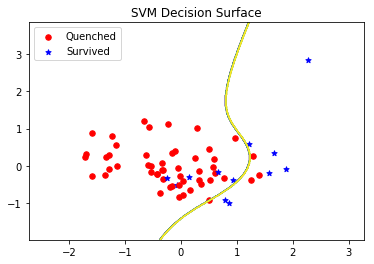

1


In [1232]:
# Example Run
SVM_Classification()

[[14  4]
 [ 0  4]]
              precision    recall  f1-score   support

         1.0       1.00      0.78      0.88        18
         4.0       0.50      1.00      0.67         4

   micro avg       0.82      0.82      0.82        22
   macro avg       0.75      0.89      0.77        22
weighted avg       0.91      0.82      0.84        22


[[14  4]
 [ 0  4]]
              precision    recall  f1-score   support

         1.0       1.00      0.78      0.88        18
         4.0       0.50      1.00      0.67         4

   micro avg       0.82      0.82      0.82        22
   macro avg       0.75      0.89      0.77        22
weighted avg       0.91      0.82      0.84        22



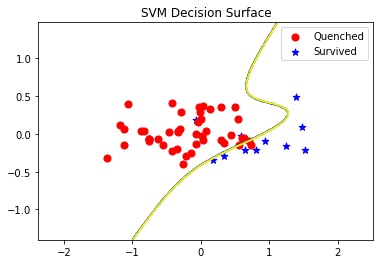

30


In [552]:
#Dont touch 
#('# Rows: ', 80, '# Columns: ', 6, array(['qlabel', 'Eccentricity(Rperi_1,Rapo_1)', 'Mstar(Rsat)[Msun]',
#       'gas_q(0.5kpc)', 'cen_gas_q(10kpc)', 'stars_q(Rsat)'], dtype=object))
SVM_Classification()

# Example

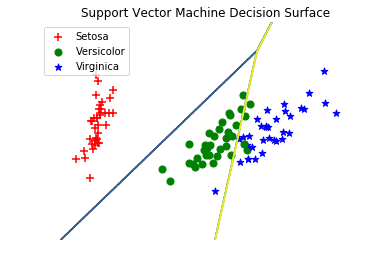

[[14  0  0]
 [ 0 14  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [302]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn import model_selection
import pylab as pl
import numpy as np
iris = load_iris()
X_train, X_test, y_train, y_test =   model_selection.train_test_split(iris.data,   iris.target, test_size=0.30, random_state=111)
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)
svmClassifier_2d =   svm.LinearSVC(random_state=111).fit(   pca_2d, y_train)
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    s=50,marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    s=50,marker='o')
    elif y_train[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    s=50,marker='*')
pl.legend([c1, c2, c3], ['Setosa', 'Versicolor',   'Virginica'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
pl.show()
pca2 = PCA(n_components=2).fit(X_test)
pca2_2d = pca.transform(X_test)
y_pred_2 = svmClassifier_2d.predict(pca2_2d)
print(metrics.confusion_matrix(y_test,y_pred_2))
print(metrics.classification_report(y_test,y_pred_2))